In [2]:
#for the testing dir
import sys
sys.path.append("/Users/ruby/Models/PyBHJet")

import build.pybhjet as pybhjet
import numpy as np
import math
import matplotlib.pyplot as plt
from bhjet_plotting import *

bhjet = pybhjet.PyBHJet()

In [3]:
bhjet.load_params("../ip.dat")
bhjet.set_parameter("infosw", 2)

In [4]:
bhjet.run()

#need to call for the output to be accessible 
output = bhjet.get_output()

#get the emission components into dictionaries to plot easier 
components = preprocess_component_output(output)


In [5]:
bhjet.print_parameters()

BHJet Parameters:
-----------------
Mbh      : 6.6e+08     M_sun
theta    : 66          degrees
dist     : 9080        kpc
redsh    : 0.003633    
jetrat   : 0.00064     Eddington ratio
r_0      : 7.72058     Jet base radius, R_g
z_diss   : 24.971      nT particle injection region, R_g
z_acc    : 24.971      Jet acceleration region, R_g
z_max    : 100000      Maximum Jet Distance, R_g
t_e      : 655.986     Temperature of rel. electrons in nozzle, keV
f_nth    : 0.1         Percentage of particles acc. into nT tail 
f_pl     : 4.67634     Dissipation Parameter
pspec    : 1.5         Slope of nT lepton distribution
f_heat   : 16.247      Shock Heating
f_beta   : 0.1         Adiabatic Cooling Timescale
f_sc     : 7.98968e-09  < 0.1, Max. E of nT particles
p_beta   : 0.02        Plasma Beta [Regulates Pair Content in BHJet for velsw > 1] 
sig_acc  : 0.01        Magnetization at acceleration region
l_disk   : 2.3e-06     Disk Luminosity, L_edd
r_in     : 20          Inner Disk Radius, R_g


In [6]:
bhjet.set_parameter("infosw", 5)
bhjet.run()


Inner disk radius: 1.94927e+15 cm, 20 rg; outer disk radius: 9.74633e+16 cm, 1000 rg; disk scale height: 0.1
Inner disk temperature: 0.000394744 kev; emitted  disk luminosity in Eddington units: 2.3e-06 and erg s^-1: 1.88015e+41

Jet base parameters: 
Pair content (ne/np): 21.0933
Initial magnetization: 4.4524
Particle average Lorenz factor: 4.12037
Jet nozzle ends at: 17.4412 Rg
Jet nozzle optical depth: 0.0020997

Bfield: 133.346 r: 7.52472e+14 z: 1.69987e+15 v.angle: 1.15192 speed: 0.436436 delta: 1.09392
Optical depth: 0.0020997 Compton-Y: 0.0661477 r: 7.52472e+14 z: 1.69987e+15 angle: 1.15192 speed: 0.436436 delta: 1.09392
Number of scatters: 1
Bfield: 32.4423 r: 7.63767e+14 z: 1.50494e+15 v.angle: 1.15192 speed: 0.922558 delta: 0.61761
Optical depth: 0.00041969 Compton-Y: 0.0132216 r: 7.63767e+14 z: 1.50494e+15 angle: 1.15192 speed: 0.922558 delta: 0.61761
Number of scatters: 1
Bfield: 1.26455 r: 7.94978e+14 z: 1.52753e+15 v.angle: 1.15192 speed: 0.986013 delta: 0.278264
Optical 

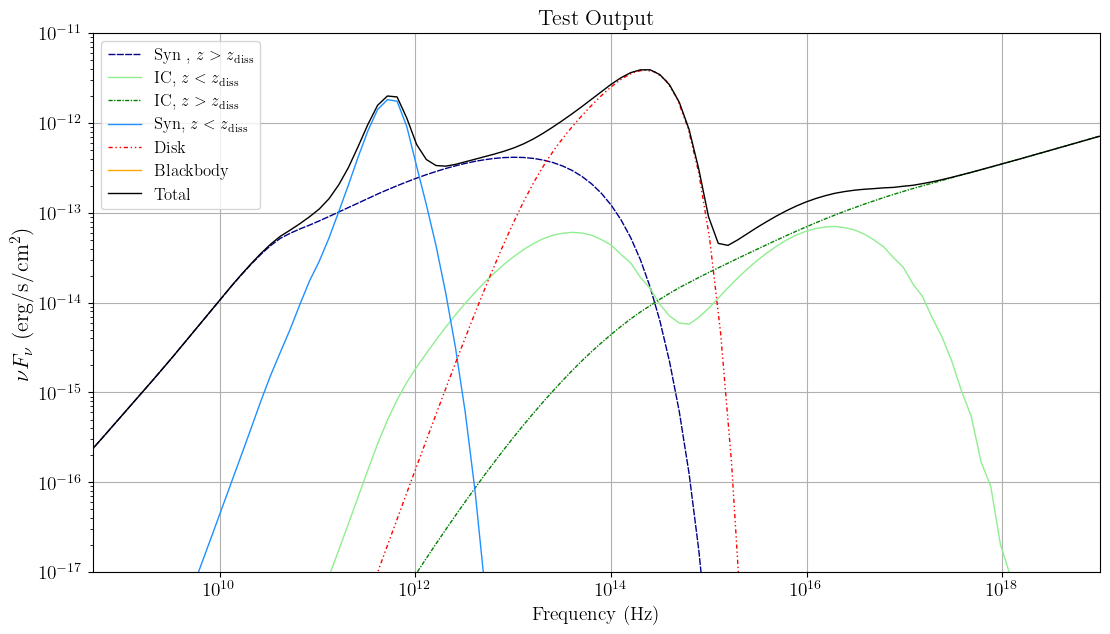

In [7]:
plot_nufnu_ergshz(components, title = 'Test Output')
plt.ylim(1e-17, 1e-11)
plt.xlim(5e8, 1e19)
plt.show()

### Multi Zone Output Comparison - Original BHJet Example

In [8]:
#for testing:
path_to_bhjet_output = "OG_BHJet_Output/"
bhjet.load_params(path_to_bhjet_output+"Input/ip.dat")
bhjet.run()
output = bhjet.get_output()

mjy = 1.e26
kevconv = 1
dist = bhjet.get_parameter("dist")
fluxconv = 4.*math.pi*(dist*3.*10**21)**2

Inner disk radius: 7.38358e+15 cm, 50 rg; outer disk radius: 1.47672e+17 cm, 1000 rg; disk scale height: 0.1
Inner disk temperature: 0.00182726 kev; emitted  disk luminosity in Eddington units: 0.01 and erg s^-1: 1.20065e+45

Jet base parameters: 
Pair content (ne/np): 31.3784
Initial magnetization: 3.61114
Particle average Lorenz factor: 2.22
Jet nozzle ends at: 38 Rg
Jet nozzle optical depth: 0.000462676



In [9]:
disk_e = np.array([point.energy for point in output.disk])
disk_f = np.array([point.flux for point in output.disk])
Disk = np.genfromtxt(path_to_bhjet_output+"Output/Disk.dat")

presyn_e = np.array([point.energy for point in output.presyn])
presyn_f = np.array([point.flux for point in output.presyn])

postsyn_e = np.array([point.energy for point in output.postsyn])
postsyn_f = np.array([point.flux for point in output.postsyn])

Presyn = np.genfromtxt(path_to_bhjet_output+"Output/Presyn.dat")
Postsyn = np.genfromtxt(path_to_bhjet_output+"Output/Postsyn.dat")

In [10]:
print("My Code: Presyn Data:", presyn_e[:1], presyn_f[:1])
print("Original Code: Presyn Data:", Presyn[:1])

My Code: Presyn Data: [27292905.4024245] [6.74146745e-08]
Original Code: Presyn Data: [[2.72929e+07 6.74147e-08]]


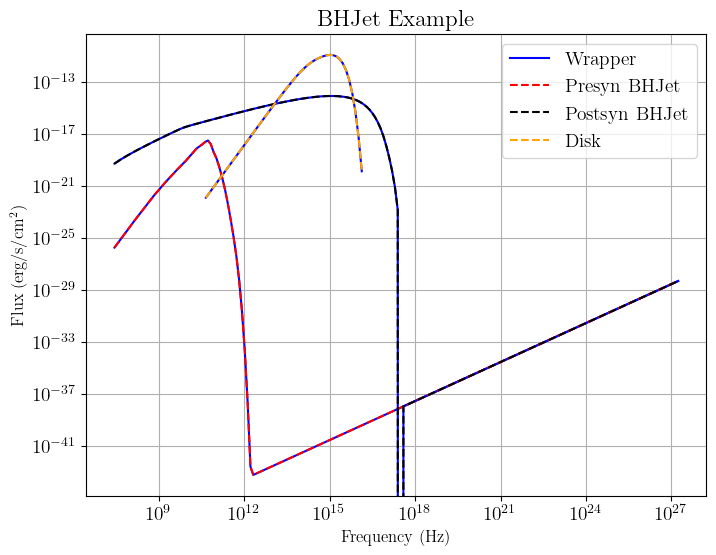

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(presyn_e, presyn_e*presyn_f/mjy_conv, linewidth=1.5, color="blue", label="Wrapper")
ax.plot(postsyn_e, postsyn_e*postsyn_f/mjy_conv, linewidth=1.5, color="blue", linestyle='-')

ax.plot(Presyn.T[0],Presyn.T[1]*Presyn.T[0]/mjy_conv,linewidth=1.5, label = "Presyn BHJet", color = 'red', linestyle = '--')
ax.plot(Postsyn.T[0],Postsyn.T[1]*Postsyn.T[0]/mjy_conv,linewidth=1.5, linestyle='--', label = 'Postsyn BHJet', color = 'black')

ax.plot(disk_e, disk_e*disk_f/mjy_conv, linewidth=1.5, color="blue")
ax.plot(Disk.T[0],Disk.T[1]*Disk.T[0]/mjy_conv, color = 'orange', linestyle = '--', label='Disk' )

# ax.set_xlim(1e8, 1e20)
# ax.set_ylim(1e-18, 1e-4)
ax.legend()
ax.grid(True)

ax.set_xlabel(r"Frequency (Hz)",fontsize=12)
ax.set_title("BHJet Example")
ax.set_ylabel(r"Flux (erg/s/cm$^2$)",fontsize=12)
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)

### Single Zone Example

In [21]:
# bhjet.run_singlezone()

In [22]:
# syn_ex = np.genfromtxt("/Users/ruby/Models/BHJet/Examples/Output/Singlezone_Syn.dat")
# com_ex = np.genfromtxt("/Users/ruby/Models/BHJet/Examples/Output/Singlezone_SSC.dat")

# energy = np.array([point.energy for point in output.cyclosyn_zones])
# flux = np.array([point.flux for point in output.cyclosyn_zones])

# e_compton = np.array([point.energy for point in output.compton_zones])
# f_compton = np.array([point.flux for point in output.compton_zones])

In [23]:
# fig, ax = plt.subplots(figsize=(8, 6))

# ax.plot(energy, energy*flux/mjy ,linewidth=1.5, color="blue", label="Wrapper")
# ax.plot(syn_ex.T[0],syn_ex.T[0]*syn_ex.T[1],linewidth=1.5, label = "Bhjet Example", color = 'red')

# ax.plot(e_compton, e_compton*f_compton/mjy, linewidth=1.5, color="blue")
# ax.plot(com_ex.T[0],com_ex.T[0]*com_ex.T[1],linewidth=1.5, color = 'red')

# ax.set_ylim(1e32, 1e38)
# ax.legend()
# ax.grid(True)

# ax.set_xlabel("Frequency ($\\rm{Hz}$)",fontsize=12)
# ax.set_ylabel("Luminosity ($\\rm{erg\,s^{-1}}$)",fontsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
